# Assignment

ဒီ Assignment မှာ ... 

1. Affine transformation တွေကို 2D plane မှာရှိတဲ့ point set $X$ တွေကို apply လုပ်ကြည့်မှာ ဖြစ်ပါတယ်။
   
2. မူလ point set $X$ နဲ့ transform လုပ်ထားတဲ့ point set $X_{\mathrm{target}}$ တွေကနေပြီး Affine transformation matrix A ကို တွက်ထုတ်ကြည့်ကြပါမယ်။
   > Note: အဖြေ တခုတည်းမက ရှိနိုင်ပါသည်။

3. ပေးထားသည့် $X \in \mathbb{R}^2$ နှင့် $y \in \mathbb{R}$ တို့မှ $x_i \in X$ မှ $y_i \in y$ ကို ပြောင်းပေးနိုင်သည့် linear function $f(x)$ ကို ရှာခြင်း

တို့ကို လုပ်ဆောင်ရမှာ ဖြစ်ပါတယ်။

In [ ]:
!git clone https://github.com/neolaw84/data_science_using_python_labs.git
%cd data_science_using_python_labs/week08

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np
from scipy import optimize, linalg

from utils import show_points

In [ ]:
X = np.vstack((
    np.array([
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]
    ]).T,
    np.ones((1, 4))
))

show_points(X)
plt.show()

စစချင်းမှာ အောက်ပါ Affine Transformation တွေကို ဒီ အမှတ် ၄ ခုကို Apply ကြရမှာ ဖြစ်ပါတယ်။

* Translation 

  $$A = \begin{bmatrix} 1 & 0 & t_0 \\
    0 & 1 & t_1 \\
    0 & 0 & 1 
  \end{bmatrix}$$

  ဥပမာ ညာဘက်ကို 0.2 unit, အောက်ဘက်ကို 0.3 unit ရွှေ့ချင်ရင် 

  $$A = \begin{bmatrix} 1 & 0 & 0.2 \\
    0 & 1 & -0.3 \\
    0 & 0 & 1 
  \end{bmatrix}
  $$ ကို သုံးရမှာ ဖြစ်တယ်။

  > အောက်မှာ နမူနာ လုပ် ပြထားတယ်။

* Mirroring (across second dimension -- dimension 1)

  $$A = \begin{bmatrix} -1 & 0 & 0 \\
    0 & 1 & 0 \\
    0 & 0 & 1 
  \end{bmatrix}$$

* Mirroring (across first dimension -- dimension 0)

  $$A = \begin{bmatrix} 1 & 0 & 0 \\
    0 & -1 & 0 \\
    0 & 0 & 1 
  \end{bmatrix}$$

* Scaling 

  $$A = \begin{bmatrix} s_0 & 0 & 0 \\
    0 & s_1 & 0 \\
    0 & 0 & 1 
  \end{bmatrix}$$

  ဥပမာ ဘယ်ညာ (dimension 0) ကို 1.5 ဆ, အပေါ်အောက် (dimension 1) ဘက်ကို 0.5 ဆ ချုံ့/ချဲ့ချင်ရင် 

  $$A = \begin{bmatrix} 1.5 & 0 & 0 \\
    0 & 0.5 & 0 \\
    0 & 0 & 1 
  \end{bmatrix}
  $$ ကို သုံးရမှာ ဖြစ်တယ်။

* Rotation

  $$A = \begin{bmatrix} cos(\theta) & -sin(\theta) & 0 \\
    sin(\theta) & cos(\theta) & 0 \\
    0 & 0 & 1 
  \end{bmatrix}$$

  ဥပမာ လက်ဝဲရစ် (anti-clockwise) $\theta = 45\degree = \pi/4$ လှည့်ချင်ရင်

  $$A = \begin{bmatrix} cos(\pi/4) & -sin(\pi/4) & 0 \\
    sin(\pi/4) & cos(\pi/4) & 0 \\
    0 & 0 & 1 
  \end{bmatrix}

  $$ ကို သုံးရမှာ ဖြစ်တယ်။

  > Note: `math.pi`, `math.sin` နဲ့ `math.cos` တို့ကို `import math` လုပ်ပြီး သုံးပါ။

* Shearing

  $$A = \begin{bmatrix} 1 & s_0 & 0 \\
    s_1 & 1 & 0 \\
    0 & 0 & 1 
  \end{bmatrix}$$

  ဥပမာ ... 

  $$A = \begin{bmatrix} 1 & 0.5 & 0 \\
  0.25 & 1 & 0 \\
  0 & 0 & 1 
  \end{bmatrix}$$ 
  
  ကို သုံးကြည့်ပါ။

In [ ]:
A = np.array([
    [1, 0, 0.2],
    [0, 1, -0.3],
    [0, 0, 1]
])

X_translated = A @ X

show_points(X)
show_points(X_translated, c="red")
plt.show()

ဒုတိယ တဆင့်အနေနဲ့ အောက်က Transformation တွေကို တစုတည်း Apply ကြည့်ပါ။ 

> Note: Transformation တွေကို အရင်မြှောက်ပြီးမှ X နဲ့ မြှောက်ရင်လဲ အဖြေတူတူပဲ ရတယ်။ စမ်းကြည့်ပါ။

* Rotate $30\degree$ anti-clockwise, then move it 0.2 unit right, then scale it across dimension $d_1$ by 1.3x
  
  $$A_0 = \begin{bmatrix} 
    cos(\pi/6) & -sin(\pi/6) & 0 \\
    sin(\pi/6) & cos(\pi/6) & 0 \\
    0 & 0 & 1
  \end{bmatrix}$$

  $$A_1 = \begin{bmatrix} 
    1 & 0 & 0.2 \\
    0 & 1 & 0 \\
    0 & 0 & 1
  \end{bmatrix}$$

  $$A_2 = \begin{bmatrix} 
    1 & 0 & 0 \\
    0 & 1.3 & 0 \\
    0 & 0 & 1
  \end{bmatrix}$$

* Mirror across dimension $d_1$ and rotate $90\degree$ clockwise

* Mirror across dimension $d_0$, then move it up 0.1 units, then rotate anti-clockwise $45\degree$

အောက်က code ကို run ပါ။ ပြီးရင် `X` နဲ့ `X_transformed` ကနေ `A` ကိုရအောင် ပြန်တွက်ထုတ်ပါ။

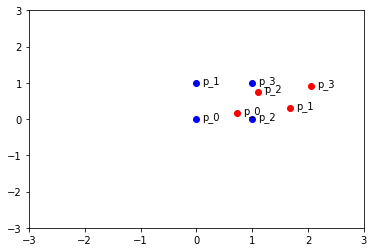

In [8]:
np.random.seed(42)

# X_transformed = A @ X
X_transformed = np.array([
    [0.73199394, 1.68270825, 1.10653406, 2.05724837],
    [0.15599452, 0.31201316, 0.754653  , 0.91067164],
    [1.        , 1.        , 1.        , 1.        ]]
)

show_points(X)
show_points(X_transformed, c="red")
plt.show()

In [ ]:
# ဒီမှာ ရေးပါ။

In [7]:
X_transformed

array([[0.73199394, 1.68270825, 1.10653406, 2.05724837],
       [0.15599452, 0.31201316, 0.754653  , 0.91067164],
       [1.        , 1.        , 1.        , 1.        ]])